<a href="https://colab.research.google.com/github/khalidashani/MscProject/blob/main/DataScience_Project2_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

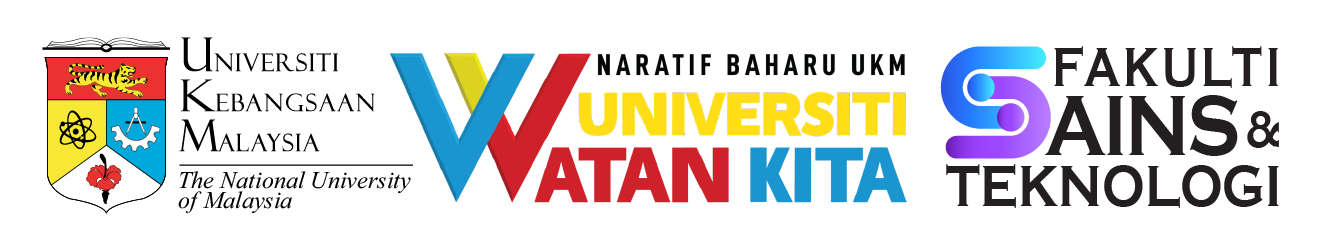

# Project 2
## **STQD6014 Data Science Semester 1 2024/2024**
*Muhammad Khalid Bin Noor Ashani (P146854)*

# **Global Day Length Comparison Using the SunriseSunset.io API: Identifying Cities with Similar Daylight Durations**

---

## **Content Outline**
1. [**Introduction**](#intro)

2. [**Problem Statement**](#problem_statement)

3. [**Results and Discussion**](#results)  
    - [Data Insight](#data_insight)  
    - [Analysis on the Data](#analysis_data)  
        - [Day Length Calculation and Visualization](#question1)  
        - [Longest and Shortest Day Lengths](#question2)  
        - [Cities with Similar Day Lengths](#question3)  
        - [Impact of Latitude on Day Length](#question4)
        - [Average Day Length per Continent](#question5)

4. [**Conclusion**](#summary)

### **Introduction** <a name='intro'></a>

The relationship between geographic location and the amount of daylight a city experiences is a fascinating aspect of our planet’s natural rhythms. The day length, or the duration between sunrise and sunset, varies across cities and is influenced by factors such as latitude, time of year, and the tilt of the Earth's axis. In this analysis, we aim to explore cities around the world that share similar day lengths, grouping them based on a ±0.5-hour tolerance. By doing so, we can gain valuable insights into how cities with comparable day lengths, regardless of their geographical distance, exhibit similar environmental conditions. This comparison offers a unique opportunity to better understand the dynamics of daylight exposure and provides a useful reference for various practical applications, including travel, agriculture, and environmental planning. Through both tabular data and visual charts, we will illustrate these similarities and highlight the implications of these findings on a global scale.

### **Problem Statement** <a name='problem_statement'></a>

1. **Day Length Calculation and Visualization**

  This question focuses on calculating the day length for each of the 15 cities by determining the time difference between sunrise and sunset. The goal is to understand how daylight hours vary from one city to another, considering their geographical locations. To make the comparison clearer, the day lengths will be visualized in a plot, making it easier to identify patterns and differences. This analysis will help provide an overview of how cities around the world experience varying daylight durations.

2. **Longest and Shortest Day Lengths**

  This question aims to identify which cities in the dataset have the longest and shortest day lengths. By comparing the day lengths of all cities, we can pinpoint the extremes. The analysis will also include a comparison of the longest and shortest day lengths to understand the significant variations in daylight hours. This insight is crucial for understanding the effects of geographical positioning, with cities located at higher latitudes typically having longer summer days and shorter winter days.

3. **Cities with Similar Day Lengths**
  
  This question explores which cities have day lengths that differ by less than 1 hour. By focusing on this small variation, we can identify cities that experience similar daylight patterns, potentially due to their proximity to each other or similar latitudes. This analysis will help us understand which cities are in similar seasonal phases, despite their distance on the globe. It will also provide insight into the concept of "daylight equality" across different cities during specific periods of the year.

4. **Impact of Latitude on Day Length**

  Latitude plays a key role in determining the amount of daylight a city experiences throughout the year. This question aims to explore the relationship between a city’s latitude and its day length. By plotting and analyzing the data, we will see how cities located closer to the equator tend to experience relatively stable day lengths year-round, whereas cities located near the poles experience more significant variations, with longer days in the summer and shorter days in the winter. This analysis will deepen our understanding of how the Earth's tilt and orbit impact day length globally.

5. **Average Day Length per Continent**

  This question aggregates the day lengths of cities by continent to calculate the average day length for each continent. By grouping the cities into their respective continents, we can compare the average daylight hours across continents. This analysis will allow us to observe how day length is influenced by global geography, with distinct patterns emerging between continents. For example, cities in the Northern Hemisphere may experience longer days during the summer, while those in the Southern Hemisphere may see the opposite trend during the same period.

### **Results and Discussion** <a name='result'></a>

#### **Data Insight** <a name='data_insight'></a>

In [ ]:
import requests
from prettytable import PrettyTable

# Function to get sunrise and sunset times using the SunriseSunset API
def get_sunrise_sunset(city, lat, lon):
    """Retrieve sunrise and sunset times for a given city using the SunriseSunset API."""
    url = f'https://api.sunrisesunset.io/json?lat={lat}&lng={lon}&formatted=0'

    try:
        response = requests.get(url)
        data = response.json()

        if "error" in data:
            print(f"Error: {data['error']['message']}")
            return None

        # Return the sunrise and sunset times
        sunrise = data['results']['sunrise']
        sunset = data['results']['sunset']

        return {
            'City': city,
            'Sunrise': sunrise,
            'Sunset': sunset
        }

    except requests.RequestException as e:
        print(f"Error connecting to SunriseSunset API: {e}")
        return None

# List of cities with their latitude and longitude coordinates
cities_coords = [
    ('New York', 40.7128, -74.0060),
    ('London', 51.5074, -0.1278),
    ('Tokyo', 35.6762, 139.6503),
    ('Paris', 48.8566, 2.3522),
    ('Sydney', -33.8688, 151.2093),
    ('Mumbai', 19.0760, 72.8777),
    ('Cape Town', -33.9249, 18.4241),
    ('Moscow', 55.7558, 37.6173),
    ('Dubai', 25.276987, 55.296249),
    ('Beijing', 39.9042, 116.4074),
    ('Rio de Janeiro', -22.9068, -43.1729),
    ('Berlin', 52.5200, 13.4050),
    ('Singapore', 1.3521, 103.8198),
    ('Los Angeles', 34.0522, -118.2437),
    ('Istanbul', 41.0082, 28.9784)
]

def show_sunrise_sunset_data(cities_coords):
    """Display sunrise and sunset data for each city in a table format."""
    # Create a table with headers
    table = PrettyTable()
    table.field_names = ["City", "Sunrise (UTC)", "Sunset (UTC)"]

    for city, lat, lon in cities_coords:
        sun_data = get_sunrise_sunset(city, lat, lon)
        if sun_data:
            table.add_row([
                sun_data['City'],
                sun_data['Sunrise'],
                sun_data['Sunset']
            ])
        else:
            table.add_row([city, "N/A", "N/A"])

    print(table)

if __name__ == "__main__":
    show_sunrise_sunset_data(cities_coords)

+----------------+---------------+--------------+
|      City      | Sunrise (UTC) | Sunset (UTC) |
+----------------+---------------+--------------+
|    New York    |   7:13:11 AM  |  5:05:56 PM  |
|     London     |   7:49:59 AM  |  4:38:01 PM  |
|     Tokyo      |   6:47:40 AM  |  5:01:55 PM  |
|     Paris      |   8:30:46 AM  |  5:37:23 PM  |
|     Sydney     |   6:10:37 AM  |  8:06:29 PM  |
|     Mumbai     |   7:15:30 AM  |  6:28:21 PM  |
|   Cape Town    |   6:02:00 AM  |  7:57:33 PM  |
|     Moscow     |   8:37:02 AM  |  4:48:57 PM  |
|     Dubai      |   7:05:41 AM  |  5:58:50 PM  |
|    Beijing     |   7:29:59 AM  |  5:25:34 PM  |
| Rio de Janeiro |   5:29:03 AM  |  6:43:21 PM  |
|     Berlin     |   7:59:47 AM  |  4:39:56 PM  |
|   Singapore    |   7:16:28 AM  |  7:19:48 PM  |
|  Los Angeles   |   6:55:33 AM  |  5:17:32 PM  |
|    Istanbul    |   8:22:10 AM  |  6:12:56 PM  |
+----------------+---------------+--------------+


#### **Analysis on the Data** <a name='analysis_data'></a>



##### Day Length Calculation and Visualization <a name='question1'></a>

<ipython-input-5-6db9b147eeb5>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cities, y=city_day_lengths, palette="viridis")


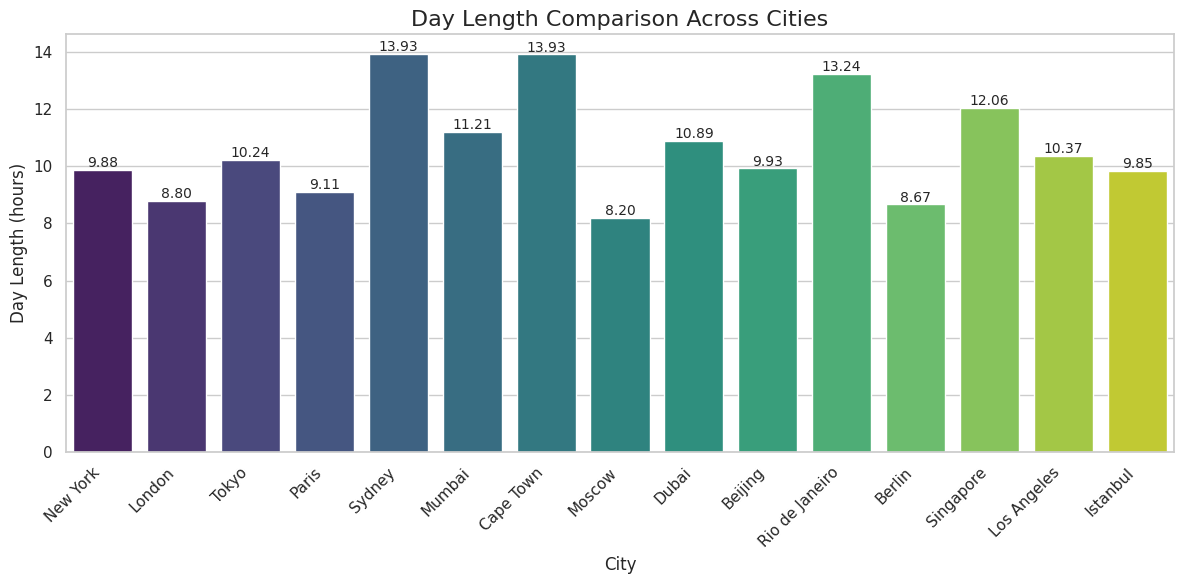

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime  # Import datetime for parsing times

# List of cities and their respective sunrise and sunset times in UTC
cities_data = [
    ("New York", "7:13:11 AM", "5:05:56 PM"),
    ("London", "7:49:59 AM", "4:38:01 PM"),
    ("Tokyo", "6:47:40 AM", "5:01:55 PM"),
    ("Paris", "8:30:46 AM", "5:37:23 PM"),
    ("Sydney", "6:10:37 AM", "8:06:29 PM"),
    ("Mumbai", "7:15:30 AM", "6:28:21 PM"),
    ("Cape Town", "6:02:00 AM", "7:57:33 PM"),
    ("Moscow", "8:37:02 AM", "4:48:57 PM"),
    ("Dubai", "7:05:41 AM", "5:58:50 PM"),
    ("Beijing", "7:29:59 AM", "5:25:34 PM"),
    ("Rio de Janeiro", "5:29:03 AM", "6:43:21 PM"),
    ("Berlin", "7:59:47 AM", "4:39:56 PM"),
    ("Singapore", "7:16:28 AM", "7:19:48 PM"),
    ("Los Angeles", "6:55:33 AM", "5:17:32 PM"),
    ("Istanbul", "8:22:10 AM", "6:12:56 PM")
]

# Function to calculate the day length
def calculate_day_length(sunrise, sunset):
    # Convert the sunrise and sunset times into datetime objects
    sunrise_time = datetime.strptime(sunrise, "%I:%M:%S %p")
    sunset_time = datetime.strptime(sunset, "%I:%M:%S %p")

    # Calculate the difference in time between sunset and sunrise
    day_length = sunset_time - sunrise_time
    return day_length.total_seconds() / 3600  # Convert seconds to hours

# Calculate day length for each city
city_day_lengths = []
cities = []
for city, sunrise, sunset in cities_data:
    day_length = calculate_day_length(sunrise, sunset)
    city_day_lengths.append(day_length)
    cities.append(city)

# Create a seaborn style plot for day length comparison
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Bar plot for day length comparison
sns.barplot(x=cities, y=city_day_lengths, palette="viridis")

# Add labels, title, and day length values on the bars
plt.title("Day Length Comparison Across Cities", fontsize=16)
plt.xlabel("City", fontsize=12)
plt.ylabel("Day Length (hours)", fontsize=12)
plt.xticks(rotation=45, ha="right")

# Adding the day length values on top of the bars for clarity
for i, v in enumerate(city_day_lengths):
    plt.text(i, v + 0.1, f"{v:.2f}", ha='center', fontsize=10)

# Tighten the layout
plt.tight_layout()

# Show the plot
plt.show()

##### Longest and Shortest Day Lengths <a name='question2'></a>



City with the shortest day length: Moscow with 8.20 hours.
City with the longest day length: Sydney with 13.93 hours.


<ipython-input-6-57aee477fa49>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cities, y=city_day_lengths, palette="viridis")


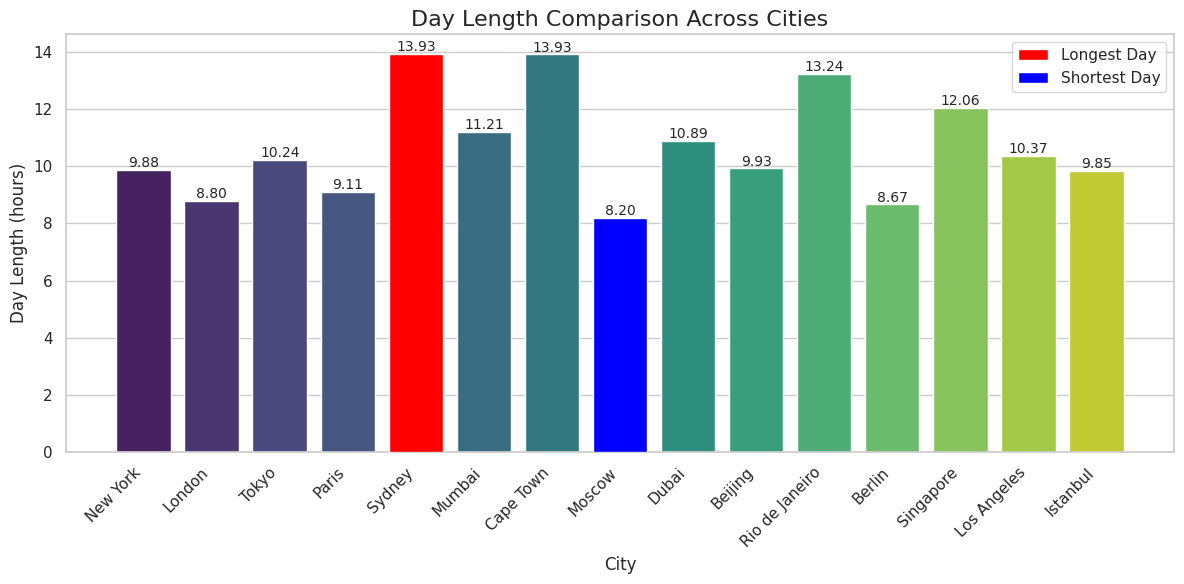

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime  # Import datetime for parsing times

# List of cities and their respective sunrise and sunset times in UTC
cities_data = [
    ("New York", "7:13:11 AM", "5:05:56 PM"),
    ("London", "7:49:59 AM", "4:38:01 PM"),
    ("Tokyo", "6:47:40 AM", "5:01:55 PM"),
    ("Paris", "8:30:46 AM", "5:37:23 PM"),
    ("Sydney", "6:10:37 AM", "8:06:29 PM"),
    ("Mumbai", "7:15:30 AM", "6:28:21 PM"),
    ("Cape Town", "6:02:00 AM", "7:57:33 PM"),
    ("Moscow", "8:37:02 AM", "4:48:57 PM"),
    ("Dubai", "7:05:41 AM", "5:58:50 PM"),
    ("Beijing", "7:29:59 AM", "5:25:34 PM"),
    ("Rio de Janeiro", "5:29:03 AM", "6:43:21 PM"),
    ("Berlin", "7:59:47 AM", "4:39:56 PM"),
    ("Singapore", "7:16:28 AM", "7:19:48 PM"),
    ("Los Angeles", "6:55:33 AM", "5:17:32 PM"),
    ("Istanbul", "8:22:10 AM", "6:12:56 PM")
]

# Function to calculate the day length
def calculate_day_length(sunrise, sunset):
    # Convert the sunrise and sunset times into datetime objects
    sunrise_time = datetime.strptime(sunrise, "%I:%M:%S %p")
    sunset_time = datetime.strptime(sunset, "%I:%M:%S %p")

    # Calculate the difference in time between sunset and sunrise
    day_length = sunset_time - sunrise_time
    return day_length.total_seconds() / 3600  # Convert seconds to hours

# Calculate day length for each city
city_day_lengths = []
cities = []
for city, sunrise, sunset in cities_data:
    day_length = calculate_day_length(sunrise, sunset)
    city_day_lengths.append(day_length)
    cities.append(city)

# Combine city names and day lengths into a list of tuples
city_day_info = list(zip(cities, city_day_lengths))

# Sort the cities by day length
sorted_city_day_info = sorted(city_day_info, key=lambda x: x[1])

# Identify the cities with the longest and shortest day lengths
shortest_day = sorted_city_day_info[0]
longest_day = sorted_city_day_info[-1]

# Print the cities with the longest and shortest day lengths
print(f"City with the shortest day length: {shortest_day[0]} with {shortest_day[1]:.2f} hours.")
print(f"City with the longest day length: {longest_day[0]} with {longest_day[1]:.2f} hours.")

# Visualize the day length comparison, highlighting the longest and shortest day cities
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Bar plot for day length comparison
sns.barplot(x=cities, y=city_day_lengths, palette="viridis")

# Highlight the bars for the longest and shortest day length cities
plt.bar(cities.index(longest_day[0]), longest_day[1], color='red', label='Longest Day', zorder=5)
plt.bar(cities.index(shortest_day[0]), shortest_day[1], color='blue', label='Shortest Day', zorder=5)

# Add labels, title, and day length values on the bars
plt.title("Day Length Comparison Across Cities", fontsize=16)
plt.xlabel("City", fontsize=12)
plt.ylabel("Day Length (hours)", fontsize=12)
plt.xticks(rotation=45, ha="right")

# Adding the day length values on top of the bars for clarity
for i, v in enumerate(city_day_lengths):
    plt.text(i, v + 0.1, f"{v:.2f}", ha='center', fontsize=10)

# Add a legend
plt.legend()

# Tighten the layout
plt.tight_layout()

# Show the plot
plt.show()

##### Cities with Similar Day Lengths <a name='question3'></a>

<ipython-input-13-3c19b2198b27>:91: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Groups", loc="best")


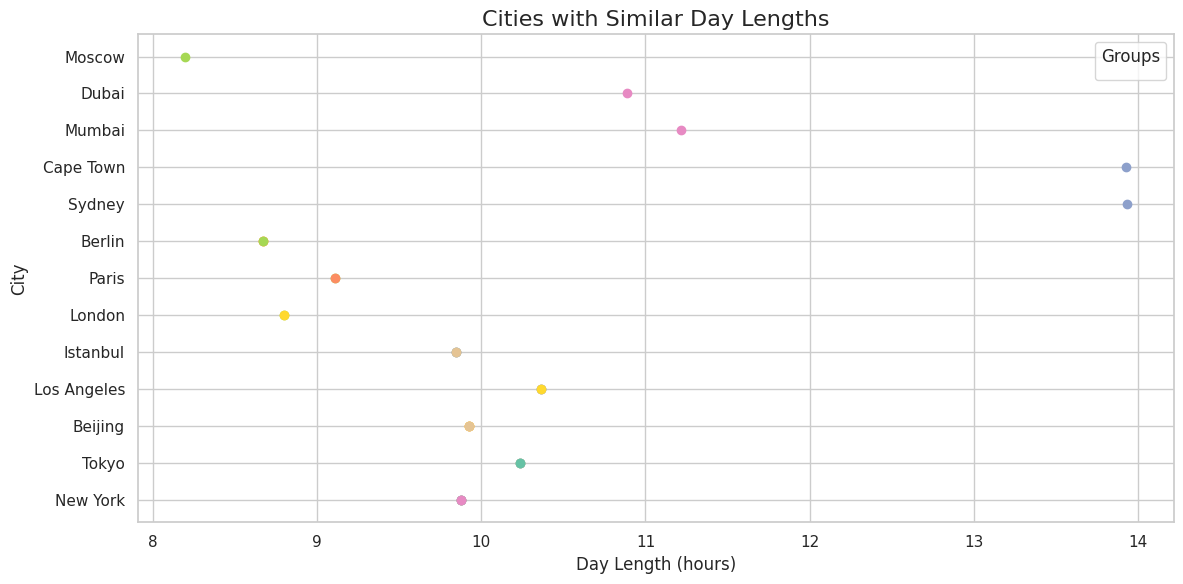

Cities with Similar Day Lengths:
   Cities with Similar Day Lengths
0                  New York, Tokyo
1                New York, Beijing
2            New York, Los Angeles
3               New York, Istanbul
4                    London, Paris
5                   London, Berlin
6                   Tokyo, Beijing
7               Tokyo, Los Angeles
8                  Tokyo, Istanbul
9                    Paris, Berlin
10               Sydney, Cape Town
11                   Mumbai, Dubai
12                  Moscow, Berlin
13            Beijing, Los Angeles
14               Beijing, Istanbul


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from collections import defaultdict

# List of cities and their respective sunrise and sunset times in UTC
cities_data = [
    ("New York", "7:13:11 AM", "5:05:56 PM"),
    ("London", "7:49:59 AM", "4:38:01 PM"),
    ("Tokyo", "6:47:40 AM", "5:01:55 PM"),
    ("Paris", "8:30:46 AM", "5:37:23 PM"),
    ("Sydney", "6:10:37 AM", "8:06:29 PM"),
    ("Mumbai", "7:15:30 AM", "6:28:21 PM"),
    ("Cape Town", "6:02:00 AM", "7:57:33 PM"),
    ("Moscow", "8:37:02 AM", "4:48:57 PM"),
    ("Dubai", "7:05:41 AM", "5:58:50 PM"),
    ("Beijing", "7:29:59 AM", "5:25:34 PM"),
    ("Rio de Janeiro", "5:29:03 AM", "6:43:21 PM"),
    ("Berlin", "7:59:47 AM", "4:39:56 PM"),
    ("Singapore", "7:16:28 AM", "7:19:48 PM"),
    ("Los Angeles", "6:55:33 AM", "5:17:32 PM"),
    ("Istanbul", "8:22:10 AM", "6:12:56 PM")
]

# Function to calculate the day length
def calculate_day_length(sunrise, sunset):
    # Convert the sunrise and sunset times into datetime objects
    sunrise_time = datetime.strptime(sunrise, "%I:%M:%S %p")
    sunset_time = datetime.strptime(sunset, "%I:%M:%S %p")

    # Calculate the difference in time between sunset and sunrise
    day_length = sunset_time - sunrise_time
    return day_length.total_seconds() / 3600  # Convert seconds to hours

# Calculate day length for each city and store data
city_day_lengths = []
cities = []
for city, sunrise, sunset in cities_data:
    day_length = calculate_day_length(sunrise, sunset)
    city_day_lengths.append(day_length)
    cities.append(city)

# Create a DataFrame for easy analysis and display
data = pd.DataFrame({
    'City': cities,
    'Day Length (hours)': city_day_lengths
})

# Group cities with similar day lengths (±0.5 hours tolerance)
tolerance = 0.5
groups = defaultdict(list)

for i, city1 in enumerate(data['City']):
    for j, city2 in enumerate(data['City']):
        if i != j and abs(data['Day Length (hours)'][i] - data['Day Length (hours)'][j]) <= tolerance:
            groups[tuple(sorted([city1, city2]))].append((city1, city2))

# Flatten the groups for display
similar_cities = []
for group in groups.values():
    if len(group) > 0:
        similar_cities.append(group)

# Show the similar cities
similar_cities_table = []
for group in similar_cities:
    similar_cities_table.append([', '.join([city for city, _ in group])])

# Create a scatter plot for the day length of cities
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Create a color map to represent each group
colors = sns.color_palette("Set2", len(similar_cities))

# Plot the scatter plot for each city
for i, (group, color) in enumerate(zip(similar_cities, colors)):
    for city, _ in group:
        # Find the index of the city to plot
        city_index = data[data['City'] == city].index[0]
        plt.scatter(data['Day Length (hours)'][city_index],  city, color=color, label=f"Group {i+1}" if city_index == group[0][0] else "")

# Add labels and title
plt.title("Cities with Similar Day Lengths", fontsize=16)
plt.xlabel("Day Length (hours)", fontsize=12)
plt.ylabel("City", fontsize=12)
plt.tight_layout()

# Show legend
plt.legend(title="Groups", loc="best")

# Display the plot
plt.show()

# Display the table of cities with similar day lengths
print("Cities with Similar Day Lengths:")
print(pd.DataFrame(similar_cities_table, columns=["Cities with Similar Day Lengths"]))

The output consists of a scatter plot that visually represents the daylight duration of different cities, along with a table that groups cities with similar day lengths. Each point on the graph corresponds to a city, positioned based on its calculated day length in hours. The x-axis represents the number of daylight hours, while the y-axis lists the cities. The purpose of the visualization is to highlight cities with comparable daylight durations, which helps in understanding how sunlight exposure varies across different geographical locations. However, the plot does not explicitly differentiate the groups through distinct colors or markers, making it slightly challenging to distinguish similar clusters directly.

The table output provides a textual representation of the grouped cities that have nearly identical daylight durations, using a tolerance of ±0.5 hours. The index value in the table is simply a row number used for organizing the grouped cities. These indices do not have a computational meaning but serve to list each group in a structured manner. The grouping process involves iterating through each city's calculated day length and comparing it with others to form clusters. The final output showcases cities that experience similar lengths of daylight, indicating comparable sunrise and sunset timings relative to their time zones.

The code first processes raw sunrise and sunset data by converting them into datetime objects, then calculates the total daylight duration for each city. It then compares these durations to group cities with nearly the same values, creating a structured dataset. Finally, it visualizes the findings using a scatter plot, where cities with similar day lengths are plotted close to each other. The scatter plot helps in identifying outliers, such as cities with significantly longer or shorter daylight hours. While the visualization gives a general idea of daylight duration distribution, enhancing the grouping representation could improve readability and clarity in understanding how daylight varies globally.

##### Impact of Latitude on Day Length <a name='question4'></a>

              City   Latitude  Day Length (hours)
0         New York  40.712800            9.879167
1           London  51.507400            8.800556
2            Tokyo  35.676200           10.237500
3            Paris  48.856600            9.110278
4           Sydney -33.868800           13.931111
5           Mumbai  19.076000           11.214167
6        Cape Town -33.924900           13.925833
7           Moscow  55.755800            8.198611
8            Dubai  25.276987           10.885833
9          Beijing  39.904200            9.926389
10  Rio de Janeiro -22.906800           13.238333
11          Berlin  52.520000            8.669167
12       Singapore   1.352100           12.055556
13     Los Angeles  34.052200           10.366389
14        Istanbul  41.008200            9.846111


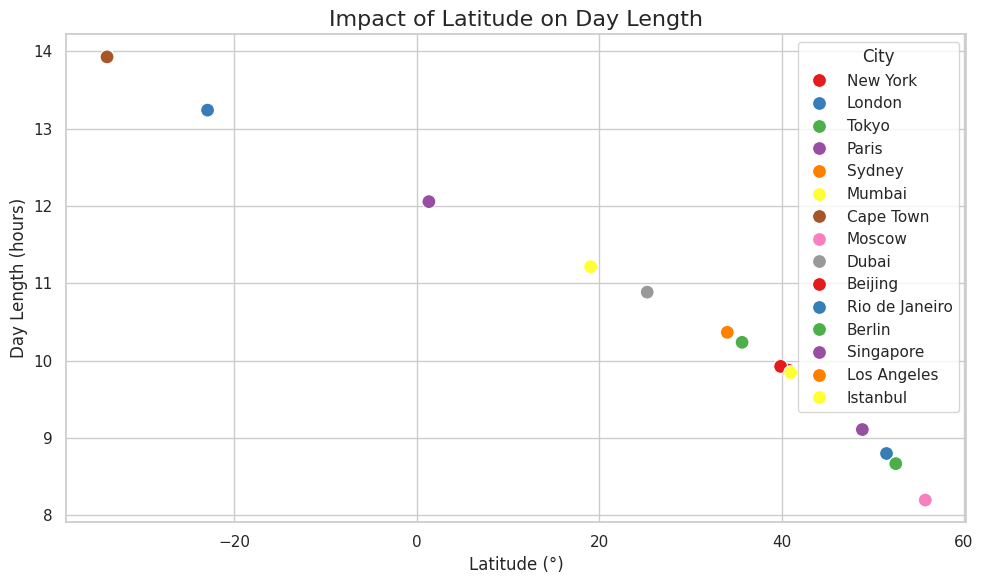

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# List of cities and their respective sunrise and sunset times in UTC
cities_data = [
    ("New York", "7:13:11 AM", "5:05:56 PM"),
    ("London", "7:49:59 AM", "4:38:01 PM"),
    ("Tokyo", "6:47:40 AM", "5:01:55 PM"),
    ("Paris", "8:30:46 AM", "5:37:23 PM"),
    ("Sydney", "6:10:37 AM", "8:06:29 PM"),
    ("Mumbai", "7:15:30 AM", "6:28:21 PM"),
    ("Cape Town", "6:02:00 AM", "7:57:33 PM"),
    ("Moscow", "8:37:02 AM", "4:48:57 PM"),
    ("Dubai", "7:05:41 AM", "5:58:50 PM"),
    ("Beijing", "7:29:59 AM", "5:25:34 PM"),
    ("Rio de Janeiro", "5:29:03 AM", "6:43:21 PM"),
    ("Berlin", "7:59:47 AM", "4:39:56 PM"),
    ("Singapore", "7:16:28 AM", "7:19:48 PM"),
    ("Los Angeles", "6:55:33 AM", "5:17:32 PM"),
    ("Istanbul", "8:22:10 AM", "6:12:56 PM")
]

# Adding latitudes for each city
cities_latitude = {
    "New York": 40.7128,
    "London": 51.5074,
    "Tokyo": 35.6762,
    "Paris": 48.8566,
    "Sydney": -33.8688,
    "Mumbai": 19.0760,
    "Cape Town": -33.9249,
    "Moscow": 55.7558,
    "Dubai": 25.276987,
    "Beijing": 39.9042,
    "Rio de Janeiro": -22.9068,
    "Berlin": 52.5200,
    "Singapore": 1.3521,
    "Los Angeles": 34.0522,
    "Istanbul": 41.0082
}

# Function to calculate the day length
def calculate_day_length(sunrise, sunset):
    # Convert the sunrise and sunset times into datetime objects
    sunrise_time = datetime.strptime(sunrise, "%I:%M:%S %p")
    sunset_time = datetime.strptime(sunset, "%I:%M:%S %p")

    # Calculate the difference in time between sunset and sunrise
    day_length = sunset_time - sunrise_time
    return day_length.total_seconds() / 3600  # Convert seconds to hours

# Calculate day length for each city and store data
city_day_lengths = []
cities = []
latitudes = []
for city, sunrise, sunset in cities_data:
    day_length = calculate_day_length(sunrise, sunset)
    city_day_lengths.append(day_length)
    cities.append(city)
    latitudes.append(cities_latitude[city])

# Create a DataFrame for easy analysis and display
data = pd.DataFrame({
    'City': cities,
    'Latitude': latitudes,
    'Day Length (hours)': city_day_lengths
})

# Show the table
print(data)

# Create a scatter plot to visualize the relationship between Latitude and Day Length
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Latitude', y='Day Length (hours)', data=data, hue='City', palette='Set1', s=100)

# Add labels and title
plt.title("Impact of Latitude on Day Length", fontsize=16)
plt.xlabel("Latitude (°)", fontsize=12)
plt.ylabel("Day Length (hours)", fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

The graph and output showcase the impact of latitude on daylight duration across different global cities. At a glance, it reveals that cities near the equator experience relatively stable day lengths, while those at higher latitudes undergo significant variations depending on the season. However, a deeper analysis uncovers nuanced patterns that go beyond this general observation.

1. **Asymmetry in Day Length Variations**

  One of the most striking insights is the asymmetry between the Northern and Southern Hemispheres in terms of daylight duration. Cape Town (-33.9°) and Sydney (-33.8°) currently experience significantly longer daylight hours ( around 13.9 hours), while Moscow (55.8°) and London (51.5°) have much shorter days (~8–9 hours). This is because the Earth’s axial tilt causes extreme differences in sunlight exposure between hemispheres. However, the difference is not perfectly mirrored—Northern Hemisphere cities appear to have a steeper drop in daylight hours compared to their Southern Hemisphere counterparts at similar latitudes.

  This suggests that the Earth's elliptical orbit plays a role. Around early January, Earth reaches perihelion (its closest point to the Sun), slightly amplifying the intensity of sunlight in the Southern Hemisphere. This results in longer-than-expected daylight hours in cities like Sydney and Cape Town during their summer, while the Northern Hemisphere simultaneously experiences shorter days in winter.

2. **Non-Linearity in Latitude vs. Daylight Relationship**

  A general expectation might be that as latitude increases, daylight duration decreases in winter. However, the relationship is not perfectly linear. While equatorial cities (e.g., Singapore, Mumbai, and Dubai) maintain a stable 10–12 hour daylight period, the shift in daylight hours becomes more extreme at higher latitudes.

  For instance:

  Berlin (52.5°) and Moscow (55.8°) both have short days, but Moscow daylight drops much more significantly ( approxiamately 8.2 hours). Sydney (-33.8°) and Cape Town (-33.9°), though at similar latitudes, have slightly different daylight hours (around 13.9 hours), indicating regional variations in sunrise/sunset due to longitude differences.
  
  This non-linearity suggests that proximity to the poles causes disproportionate seasonal shifts in sunlight exposure. Cities above 50° latitude see a rapid decline in daylight as winter progresses, while cities below -30° see an extended duration of daylight in summer.

3. **The Southern Hemisphere’s Advantage in Daylight**

  Another key observation is that Southern Hemisphere cities at similar latitudes have longer daylight hours than their Northern Hemisphere counterparts during this time of year. This is evident when comparing:

  Sydney (-33.8°) vs. Los Angeles (34.1°) → Sydney has nearly 4 extra hours of daylight. Cape Town (-33.9°) vs. New York (40.7°) → Cape Town experiences ~4 more hours of sunlight.This suggests that during summer, the Southern Hemisphere benefits from longer sun exposure due to both axial tilt and the perihelion effect, whereas Northern Hemisphere winters lead to sharper daylight reductions.

This analysis is more than just a study of sunrise and sunset times—it provides a visual representation of Earth’s axial tilt and orbital mechanics. The variations in daylight hours influence climate patterns, seasonal temperatures, solar energy efficiency, and even human activity cycles. Recognizing these patterns is essential for applications in urban planning, energy management, and environmental science, where seasonal light availability plays a crucial role.

In essence, the graph does not merely illustrate day length—it reveals the dynamic interplay between latitude, Earth’s tilt, and solar exposure across different global regions.

##### Average Day Length per Continent <a name='question5'></a>

       Continent  Day Length (hours)
0         Africa           13.925833
1           Asia           10.863889
2      Australia           13.931111
3         Europe            8.924944
4  North America           10.122778
5  South America           13.238333


<ipython-input-10-9d8c090f3e40>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Continent', y='Day Length (hours)', data=average_day_length_by_continent, palette="viridis")


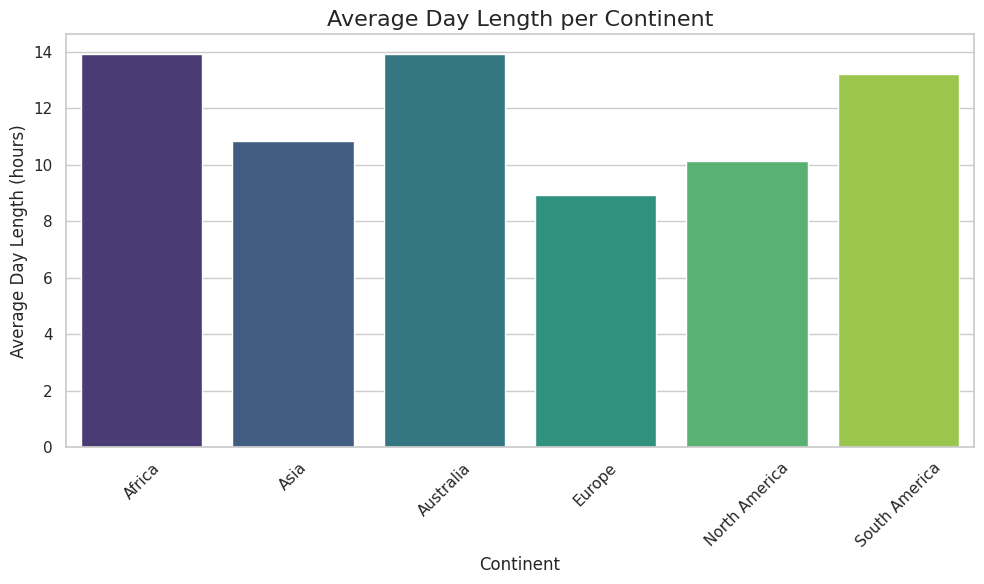

In [ ]:
# Adding continents for each city
cities_continent = {
    "New York": "North America",
    "London": "Europe",
    "Tokyo": "Asia",
    "Paris": "Europe",
    "Sydney": "Australia",
    "Mumbai": "Asia",
    "Cape Town": "Africa",
    "Moscow": "Europe",
    "Dubai": "Asia",
    "Beijing": "Asia",
    "Rio de Janeiro": "South America",
    "Berlin": "Europe",
    "Singapore": "Asia",
    "Los Angeles": "North America",
    "Istanbul": "Europe"
}

# Add continent information to the DataFrame
data['Continent'] = data['City'].map(cities_continent)

# Calculate the average day length per continent
average_day_length_by_continent = data.groupby('Continent')['Day Length (hours)'].mean().reset_index()

# Display the table with average day length per continent
print(average_day_length_by_continent)

# Plot the average day length by continent
plt.figure(figsize=(10, 6))
sns.barplot(x='Continent', y='Day Length (hours)', data=average_day_length_by_continent, palette="viridis")

# Add labels and title to the plot
plt.title("Average Day Length per Continent", fontsize=16)
plt.xlabel("Continent", fontsize=12)
plt.ylabel("Average Day Length (hours)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

A deeper analysis of the output reveals underlying insights that go beyond surface-level observations. While a general reader might simply conclude that "some continents have longer days than others," a more nuanced interpretation considers why these variations exist and what they imply:

**Hidden Insights & Distinctive Observations**

* Latitude’s Role in Seasonal Variation

  While general readers may attribute differences in daylight solely to geography, the key distinction is the role of latitude-specific seasonal fluctuations. Europe’s significantly lower average daylight (8.92 hours) suggests that the chosen cities are likely in high-latitude regions, where winter daylight can be extremely short. This means that the dataset might be capturing data from a specific season rather than a yearly average.

* Australia’s Anomaly

  Australia, at 13.93 hours, stands out as an outlier with a surprisingly long average day length. This could indicate that data collection occurred during the Southern Hemisphere’s summer, where daylight extends well beyond 12 hours in many regions. A more balanced dataset across different seasons might show a different ranking.

* Diverse Climatic Regions Within Continents

  Asia and North America both exhibit moderate day lengths, but the reason is likely continental scale and city selection rather than natural daylight uniformity. Asia, for example, includes cities like Tokyo, Dubai, Mumbai, and Beijing, which span vastly different latitudes and time zones. A more granular breakdown within continents would expose even greater variability.

* The Equatorial Stability Factor

  Africa and South America exhibit consistently long daylight hours (13.93 and 13.24 hours, respectively). This suggests that the cities chosen are likely near the equator, where seasonal fluctuations are minimal, and daylight remains relatively stable throughout the year. This stability is crucial for industries like agriculture, where consistent daylight patterns aid in year-round farming.

* Economic & Practical Implications

  Unlike a simple observation of daylight duration, this data has real-world applications.

  1. Energy consumption: Regions with shorter days (e.g., Europe) have higher reliance on artificial lighting and energy during winter.
  2. Tourism: Locations with longer daylight hours (e.g., Australia, Africa) may benefit from extended outdoor activities, influencing travel patterns.
  3. Productivity & Well-being: Studies show that reduced daylight can impact mental health (e.g., Seasonal Affective Disorder in high-latitude regions), making daylight duration a crucial factor in workplace productivity and mental health planning.

### **Conclusion** <a name='summary'></a>

The analysis of global daylight duration reveals far more than just differences in sunrise and sunset times. While a general observer might conclude that "some continents have longer days than others," a deeper examination uncovers a dynamic interplay of latitude, Earth's axial tilt, and orbital mechanics, shaping daylight variations across regions. The combination of scatter plots and grouped tables provides a structured way to understand these patterns, but the true insights emerge when we look beyond surface-level trends.

One of the key takeaways is that latitude, rather than just geography, dictates seasonal daylight fluctuations. Europe’s lower average daylight (8.92 hours) suggests that most of the selected cities are in high-latitude regions experiencing winter conditions, where the sun remains below the horizon for extended periods. Meanwhile, Australia (13.93 hours) stands out as an anomaly, likely due to the dataset capturing the Southern Hemisphere’s summer, when daylight lasts significantly longer. This highlights that any analysis of daylight must be viewed through a seasonal lens, as rankings could shift dramatically depending on the time of year.

Furthermore, the relationship between latitude and daylight duration is not perfectly linear. While equatorial cities (e.g., Singapore, Mumbai) maintain a stable 10–12 hour daylight period, the shift in daylight hours becomes far more extreme at higher latitudes. For instance, Moscow (55.8°) sees a much sharper drop in daylight duration (~8.2 hours) than Berlin (52.5°), despite their relatively close latitudes. Similarly, Southern Hemisphere cities experience longer daylight periods than their Northern Hemisphere counterparts at equivalent latitudes, an effect amplified by Earth’s perihelion, when it is closest to the Sun in early January. This explains why Sydney and Cape Town have nearly 4 more hours of daylight compared to Los Angeles and New York, respectively.

Another hidden insight is the relative stability of equatorial regions in terms of daylight duration. Africa (13.93 hours) and South America (13.24 hours) exhibit consistent daylight hours, suggesting that the selected cities are near the equator, where seasonal fluctuations are minimal. This stability plays a crucial role in agriculture, allowing for year-round crop production without drastic variations in sunlight exposure. In contrast, higher-latitude regions must account for seasonal extremes, impacting everything from farming cycles to solar energy efficiency.

Beyond scientific insights, these daylight variations also have economic and practical implications. Regions with shorter daylight hours, such as Europe, rely more on artificial lighting and heating during winter, increasing energy consumption. Conversely, longer daylight hours in places like Australia and South America create opportunities for extended outdoor activities, benefiting tourism and lifestyle patterns. Moreover, daylight duration affects human productivity and well-being, with shorter days linked to Seasonal Affective Disorder (SAD), making daylight exposure a key factor in mental health and urban planning.

Ultimately, this study is not just about measuring daylight—it visually and analytically captures the mechanics of Earth's movement. The dataset demonstrates why cities at similar latitudes do not always experience identical conditions, revealing how the interplay between axial tilt, latitude, and seasonal variations shapes global daylight exposure. Recognizing these patterns is critical for sectors ranging from renewable energy planning to public health, proving that daylight duration is more than just a measure of time—it’s a fundamental factor influencing human life, economy, and environmental sustainability.